In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
keras.__version__

'2.2.4-tf'

## Image Classifier

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
# scale the input features for GD
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# create the class names labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [6]:
# creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [12]:
# training
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.2221 - accuracy: 0.9200 - val_loss: 0.3043 - val_accuracy: 0.8940
Epoch 2/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.2178 - accuracy: 0.9211 - val_loss: 0.2953 - val_accuracy: 0.8954
Epoch 3/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2148 - accuracy: 0.9221 - val_loss: 0.2950 - val_accuracy: 0.8924
Epoch 4/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2113 - accuracy: 0.9249 - val_loss: 0.2961 - val_accuracy: 0.8942
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.2077 - accuracy: 0.9249 - val_loss: 0.2942 - val_accuracy: 0.8958
Epoch 6/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.2049 - accuracy: 0.9268 - val_loss: 0.2943 - val_accuracy: 0.8980
Epoch 7/30
55000/55000 [==============================]

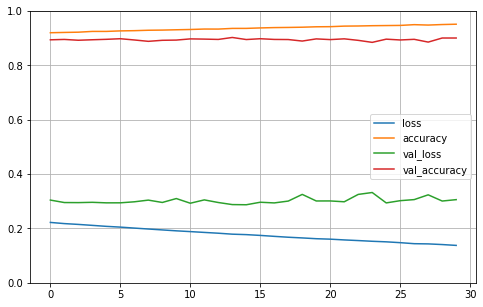

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# evaluate model
model.evaluate(X_test, y_test)

In [15]:
# make new predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
import numpy as np

y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Regression MLP

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] #let's pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 1.0678 - val_loss: 0.5891
Epoch 2/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5284 - val_loss: 0.5264
Epoch 3/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4869 - val_loss: 0.4841
Epoch 4/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4639 - val_loss: 0.4702
Epoch 5/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4494 - val_loss: 0.4750
Epoch 6/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4412 - val_loss: 0.4481
Epoch 7/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4337 - val_loss: 0.4433
Epoch 8/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4263 - val_loss: 0.4398
Epoch 9/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4197 - val_l

In [21]:
y_pred

array([[1.6403838],
       [4.0461516],
       [1.0718546]], dtype=float32)

## Save and Restore Model

In [22]:
model.save("first_model.h5")
model = keras.models.load_model("first_model.h5")

## Callbacks

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3718 - val_loss: 0.3940
Epoch 2/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3728 - val_loss: 0.3890
Epoch 3/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3720 - val_loss: 0.3910
Epoch 4/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3681 - val_loss: 0.4231
Epoch 5/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3657 - val_loss: 0.3876
Epoch 6/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3630 - val_loss: 0.3869
Epoch 7/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3663 - val_loss: 0.3891
Epoch 8/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3711 - val_loss: 0.3821
Epoch 9/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3584 - val_l

In [25]:
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3585 - val_loss: 0.3831
Epoch 2/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3571 - val_loss: 0.3782
Epoch 3/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3533 - val_loss: 0.3833
Epoch 4/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3546 - val_loss: 0.3753
Epoch 5/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3529 - val_loss: 0.3824
Epoch 6/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3592 - val_loss: 0.3731
Epoch 7/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3506 - val_loss: 0.3712
Epoch 8/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3618 - val_loss: 0.3801
Epoch 9/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.353

## TensorBoard

In [27]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [29]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3235 - val_loss: 0.3445
Epoch 2/30
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3224 - val_loss: 0.3430
Epoch 3/30
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3206 - val_loss: 0.3562
Epoch 4/30
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3223 - val_loss: 0.3410
Epoch 5/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3194 - val_loss: 0.3414
Epoch 6/30
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3250 - val_loss: 0.3362
Epoch 7/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3193 - val_loss: 0.3443
Epoch 8/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3192 - val_loss: 0.3393
Epoch 9/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3178 - val_l

In [30]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006